#Instalacion librerias


In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm chembl_webresource_client git+https://github.com/ikmckenz/adme-pred-py.git

  Cloning https://github.com/ikmckenz/adme-pred-py.git to /tmp/pip-req-build-atns6s1l
  Running command git clone --filter=blob:none --quiet https://github.com/ikmckenz/adme-pred-py.git /tmp/pip-req-build-atns6s1l
  Resolved https://github.com/ikmckenz/adme-pred-py.git to commit 8091a02fe5998b8ba237760ade7ff3400abbbcdd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
  Created wheel for adme-pred: filename=adme_pred-0.0.2-py3-none-any.whl size=18561 sha256=25302c5dbb20b4203eec908b1dab4fde6f494145ca7632cce9928d8891355cfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-gcq3xnnh/wheels/0b/cd/8f/5b6314f4393bde6a8e1378ff709adf4c3a59e4ee2f4ef88256
Successfully built adme-pred
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninst

In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm useful_rdkit_utils seaborn scikit-posthocs chembl_downloader chembl_webresource_client  pubchempy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=01817512dd76dc9cf457377f4506b6ad95912c5b6b86097c70b32fb932c51e70
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


#Importacion

In [ ]:
import os

# Importar libreria para guardar trabajar con tablas
import pandas as pd
import numpy as np

# Importar las librerias de RDKit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

# Importar las funciones de 'scipy'
from scipy.cluster.hierarchy import dendrogram, linkage, is_valid_linkage, cut_tree

# Importar las funciones de 'sklearn'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

# Importar libreria de PubChem
import pubchempy as pcp

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

# Importar el módulo de advertencias
import warnings

# Importar el módulo sys
import sys
np.set_printoptions(threshold=sys.maxsize)


from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols


# Importar libreria de RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# Importar libreria para cambiar el directorio y guardar archivos
import os

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

import pandas as pd

from chembl_webresource_client.new_client import new_client

# Importar libreria de ADME
from adme_pred import ADME

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Active","Inactive"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_true, y_pred, labels=['Active', 'Inactive'], pos_label='Active')
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

#Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Indicar la carpeta de trabajo
#path_luz = '/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos'
path_luz = "/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos/Activos_contra_Lys"
path_mer = '/content/drive/Shareddrives/Doctorado/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos/Activos_contra_Lys'
os.chdir(path_luz)

#Modelo

In [ ]:
total=pd.read_csv("Resultados_compuestos_lys_con_kmeans.csv")

In [ ]:
total


,Unnamed: 0,index,canonical_smiles,ROMol,InchiKey,Activity,Organismo,assay_chembl_id,type,Cluster_PCA_5,Cluster_PCA_3
0,0,0,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,<rdkit.Chem.rdchem.Mol object at 0x78af47ae3ca0>,QQWUGDVOUVUTOY-UHFFFAOYSA-N,Active,Human,CHEMBL1006347,IC50,1,2
1,1,1,Cc1ccc(NC(=O)c2cccc(C(F)(F)F)c2)cc1N1Cc2cnc(N)...,<rdkit.Chem.rdchem.Mol object at 0x78af47ae3f40>,ZWVLMQTXUWMUII-UHFFFAOYSA-N,Active,Human,CHEMBL974011,EC50,4,2
2,2,4,CN(C)c1ccc(-c2cc3ncccc3c(NCCCCN)n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x78af46be06d0>,SBGMPUIVPOGTGN-UHFFFAOYSA-N,Active,Human,CHEMBL1025770,IC50,2,0
3,3,5,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,<rdkit.Chem.rdchem.Mol object at 0x78af46be0270>,HKSZLNNOFSGOKW-FYTWVXJKSA-N,Active,Human,CHEMBL981176,IC50,1,2
4,4,6,COc1cc(Nc2nc(N[C@H]3CCCC[C@H]3N)n3nc(-c4ccccc4...,<rdkit.Chem.rdchem.Mol object at 0x78af46be02e0>,VLHKHLQNVJKAHG-UXHICEINSA-N,Active,Human,CHEMBL981176,IC50,4,2
...,...,...,...,...,...,...,...,...,...,...,...
858,858,69385,COc1cccc(C(=O)N(C)Cc2ncc(C)c(OC)c2C)c1OC,<rdkit.Chem.rdchem.Mol object at 0x78af464eaea0>,CIRJDJPKZVILCS-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL4649943,pIC50,0,0
859,859,69386,Cc1nc(NC(=O)CN2CCOC(Cn3cccn3)C2)sc1C,<rdkit.Chem.rdchem.Mol object at 0x78af464eaf10>,NZPZSVJYQCXJJP-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL4649943,pIC50,2,0
860,860,69387,Cc1nnc(NC(=O)CN2CCOC(Cn3cccn3)C2)s1,<rdkit.Chem.rdchem.Mol object at 0x78af464eaf80>,HXDHRJAZKRSGOC-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL4649943,pIC50,2,0
861,861,69388,Cc1nn(C)c(C)c1NC(=O)CN1CCOC(Cn2cccn2)C1,<rdkit.Chem.rdchem.Mol object at 0x78af464eaff0>,FSRYXQIGIYUPBA-UHFFFAOYSA-N,Inactive,Plasmodium,CHEMBL4649943,pIC50,2,0


In [ ]:
total["Activity_metric"]=total["Activity_metric"].fillna("I")

#GRID SEARCH AUTOMATCO

In [ ]:
# filtrar SMILES que no den error
SMILES = []
for i in range(len(total['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(total['canonical_smiles'].iloc[i])
    SMILES.append(cs)
  except:
    print('Invalid SMILES:',total['canonical_smiles'].iloc[i],i)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptors = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity= total["Activity"].tolist()

In [ ]:
X = np.array(descriptors)
y = np.array(Activity)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

##sin cross validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly',C= 0.1, coef0= 0,degree= 2,random_state=42))
                    ])

model_poly.fit(X_train, y_train)


y_svm_pred_sincross= model_poly.predict(X_test)

SVM Metrics:
Accuracy: 0.9364161849710982
Recall: 0.3125
Precision: 1.0
F1-Score: 0.47619047619047616
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)


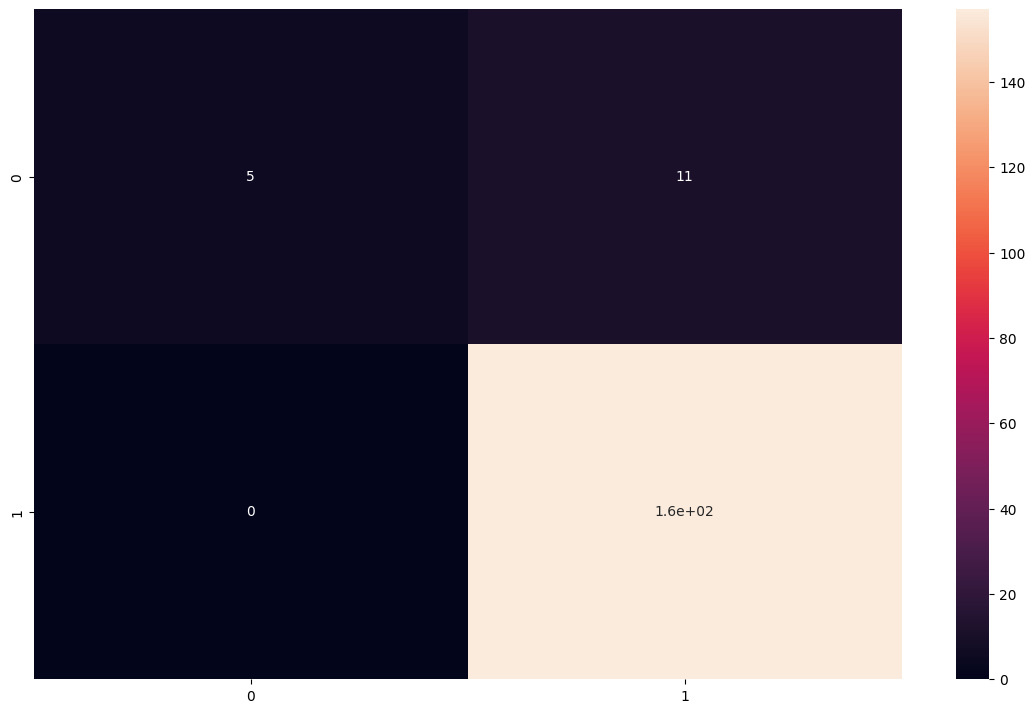

In [ ]:
# Calcular métricas para SVM
accuracy_svm = accuracy_score(y_test,y_svm_pred_sincross)
recall_svm = recall_score(y_test, y_svm_pred_sincross, pos_label="Active")
precision_svm = precision_score(y_test, y_svm_pred_sincross,pos_label="Active")
f1_svm = f1_score(y_test, y_svm_pred_sincross,pos_label="Active")
conf_matrix_svm = confusion_matrix(y_test,y_svm_pred_sincross)
#roc_auc_svm = roc_auc_score(y_test,y_svm_pred_sincross)


# Imprimir métricas para SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1-Score:", f1_svm)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_svm,annot=True))

##con cross validation a azar

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score


model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                       ])
f1_scorer = make_scorer(f1_score, pos_label='Active')


svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=2,
                      scoring=f1_scorer)



svm_cv_poly.fit(X_train, y_train)

print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)


mejor_modelo=svm_cv_poly.best_estimator_




# Realizar predicciones con SVM
y_svm_pred = mejor_modelo.predict(X_test)



Mejores hiperparámetros: {'svm__C': 0.025, 'svm__coef0': 3, 'svm__degree': 5}
Mejor Accuracy 0.750116139621387


SVM Metrics:
Accuracy: 0.9190751445086706
Recall: 0.125
Precision: 1.0
F1-Score: 0.2222222222222222
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)


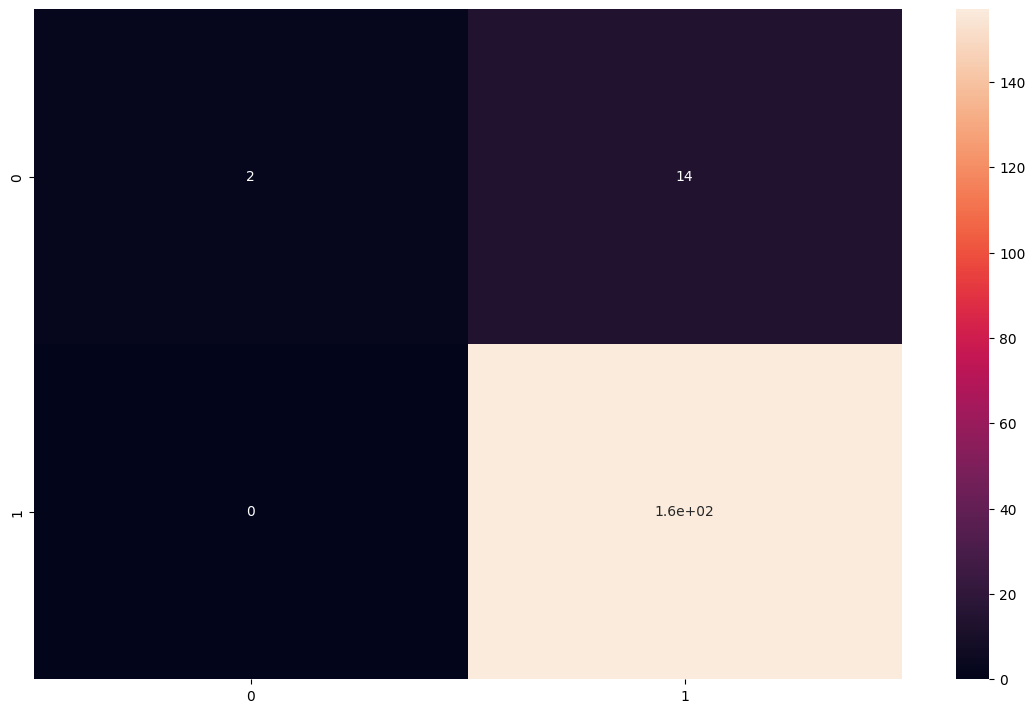

In [ ]:
# Calcular métricas para SVM
accuracy_svm = accuracy_score(y_test,y_svm_pred)
recall_svm = recall_score(y_test, y_svm_pred, pos_label="Active")
precision_svm = precision_score(y_test, y_svm_pred,pos_label="Active")
f1_svm = f1_score(y_test, y_svm_pred,pos_label="Active")
conf_matrix_svm = confusion_matrix(y_test,y_svm_pred)
#roc_auc_svm = roc_auc_score(y_test,y_svm_pred_sincross)


# Imprimir métricas para SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1-Score:", f1_svm)
print("Confusion Matrix:\n", sns.heatmap(conf_matrix_svm,annot=True))

##con cross validation por clusters

In [ ]:
clusters = total["Cluster_PCA_5"].tolist()
descriptors["Cluster_PCA_5"]= clusters

#GRID SEARCH MANUAL

In [ ]:
total["Activity"].value_counts()

Inactive    784
Active       79
Name: Activity, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_entrenamiento, total_prueba = train_test_split(total, test_size=0.2, random_state=42)

In [ ]:
cluster0= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==0]
cluster1= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==1]
cluster2= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==2]
cluster3= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==3]
cluster4= total_entrenamiento[total_entrenamiento["Cluster_PCA"]==4]

##Entrenamiento (1) 0,1,2,3 y testeo en 4

In [ ]:
entrenamiento1= pd.concat([cluster0,cluster1,cluster2,cluster3])
testeo1= cluster4

In [ ]:
entrenamiento1["Activity"].value_counts()

Inactive    600
Active       33
Name: Activity, dtype: int64

In [ ]:
# filtrar SMILES que no den error
SMILES1 = []
for i in range(len(entrenamiento1['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento1['canonical_smiles'].iloc[i])
    SMILES1.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento1['canonical_smiles'].iloc[i],i)

In [ ]:
# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES1]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

Entrenamiento

In [ ]:
descriptors1 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity1= entrenamiento1['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X1 = np.array(descriptors1)
y1 = np.array(Activity1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                    ])


# empecé buscando algunos hiperparámetros genéricos y fui agregando para que los seleccionados no me queden en el borde
# Para poder usar el gridsearch con el pipeline, tienen que usar nombreestimador__parámetro para poder usar la grilla
svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=5,
                      scoring='accuracy')


svm_cv_poly.fit(X1, y1)
print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)

mejor_modelo=svm_cv_poly.best_estimator_

Mejores hiperparámetros: {'svm__C': 0.05, 'svm__coef0': 3, 'svm__degree': 4}
Mejor Accuracy 0.9700037495313086


Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt = []
for i in range(len(testeo1['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo1['canonical_smiles'].iloc[i])
    SMILESt.append(cs)

  except:
    print('Invalid SMILES:',testeo1['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt= testeo1['Activity'].tolist()

In [ ]:
Xt = np.array(descriptorst)
yt = np.array(Activityt)

pred_cluster4 = mejor_modelo.predict(Xt)

###Resultados 1

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt, pred_cluster4), 3)
precision = round(precision_score(yt,pred_cluster4, average='micro'), 3)
recall = round(recall_score(yt, pred_cluster4, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt,pred_cluster4)

Exactitud (Accuracy): 0.544
Precisión: 0.544
Exhaustividad (Recall): 0.544
F1-Score: 0.544


array([[14, 16],
       [10, 17]])

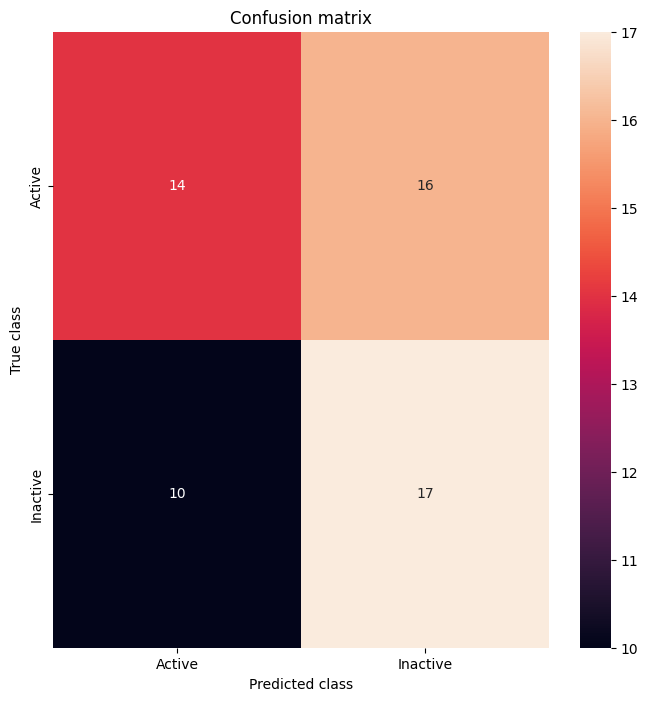

              precision    recall  f1-score   support

      Active       0.58      0.47      0.52        30
    Inactive       0.52      0.63      0.57        27

    accuracy                           0.54        57
   macro avg       0.55      0.55      0.54        57
weighted avg       0.55      0.54      0.54        57



In [ ]:
mostrar_resultados(yt, pred_cluster4)

##Entrenamiento(2) 0,1,2,4 y testeo en 3

In [ ]:
entrenamiento2= pd.concat([cluster0,cluster1,cluster2,cluster4])
testeo2= cluster3

In [ ]:
entrenamiento2["Activity"].value_counts()

Inactive    499
Active       58
Name: Activity, dtype: int64

In [ ]:
# filtrar SMILES que no den error
SMILES2= []
for i in range(len(entrenamiento2['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento2['canonical_smiles'].iloc[i])
    SMILES2.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento2['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES2]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors2 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity2= entrenamiento2['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X2= np.array(descriptors2)
y2 = np.array(Activity2)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                    ])


# empecé buscando algunos hiperparámetros genéricos y fui agregando para que los seleccionados no me queden en el borde
# Para poder usar el gridsearch con el pipeline, tienen que usar nombreestimador__parámetro para poder usar la grilla
svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=5,
                      scoring='accuracy')


svm_cv_poly.fit(X2, y2)
print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)

mejor_modelo2=svm_cv_poly.best_estimator_

Mejores hiperparámetros: {'svm__C': 1, 'svm__coef0': 1.5, 'svm__degree': 6}
Mejor Accuracy 0.9048262548262549


Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt2 = []
for i in range(len(testeo2['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo2['canonical_smiles'].iloc[i])
    SMILESt2.append(cs)

  except:
    print('Invalid SMILES:',testeo2['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt2]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst2 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt2= testeo2['Activity'].tolist()

In [ ]:
Xt2 = np.array(descriptorst2)
yt2 = np.array(Activityt2)

pred_cluster3= mejor_modelo2.predict(Xt2)

###Restultados 2

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt2, pred_cluster3), 3)
precision = round(precision_score(yt2,pred_cluster3, average='micro'), 3)
recall = round(recall_score(yt2, pred_cluster3, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt2,pred_cluster3)

Exactitud (Accuracy): 0.985
Precisión: 0.985
Exhaustividad (Recall): 0.985
F1-Score: 0.985


array([[  5,   0],
       [  2, 126]])

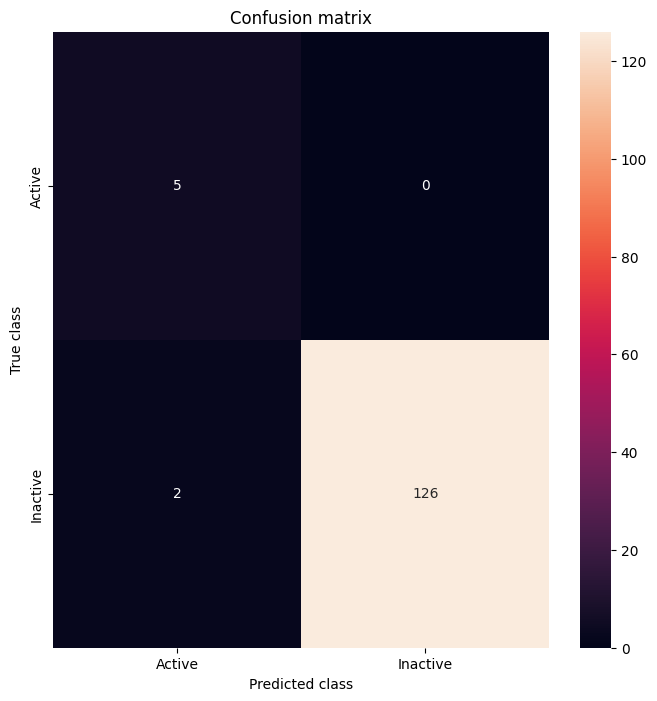

              precision    recall  f1-score   support

      Active       0.71      1.00      0.83         5
    Inactive       1.00      0.98      0.99       128

    accuracy                           0.98       133
   macro avg       0.86      0.99      0.91       133
weighted avg       0.99      0.98      0.99       133



In [ ]:
mostrar_resultados(yt2, pred_cluster3)

##Entrenamiento(3) 0,1,3,4 y testeo en 2

In [ ]:
entrenamiento3= pd.concat([cluster0,cluster1,cluster4,cluster3])
testeo3= cluster2

In [ ]:
entrenamiento3["Activity"].value_counts()

Inactive    452
Active       54
Name: Activity, dtype: int64

In [ ]:
# filtrar SMILES que no den error
SMILES3= []
for i in range(len(entrenamiento3['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento3['canonical_smiles'].iloc[i])
    SMILES3.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento3['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES3]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors3 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity3= entrenamiento3['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X3= np.array(descriptors3)
y3 = np.array(Activity3)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                    ])


# empecé buscando algunos hiperparámetros genéricos y fui agregando para que los seleccionados no me queden en el borde
# Para poder usar el gridsearch con el pipeline, tienen que usar nombreestimador__parámetro para poder usar la grilla
svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=5,
                      scoring='accuracy')


svm_cv_poly.fit(X3, y3)
print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)

mejor_modelo3=svm_cv_poly.best_estimator_

Mejores hiperparámetros: {'svm__C': 0.1, 'svm__coef0': 0, 'svm__degree': 2}
Mejor Accuracy 0.9091244418559503


Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt3 = []
for i in range(len(testeo3['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo3['canonical_smiles'].iloc[i])
    SMILESt3.append(cs)

  except:
    print('Invalid SMILES:',testeo3['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt3]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst3 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt3= testeo3['Activity'].tolist()

In [ ]:
Xt3 = np.array(descriptorst3)
yt3 = np.array(Activityt3)

pred_cluster2= mejor_modelo3.predict(Xt3)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt3,pred_cluster2), 3)
precision = round(precision_score(yt3,pred_cluster2, average='micro'), 3)
recall = round(recall_score(yt3, pred_cluster2, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt3,pred_cluster2)

Exactitud (Accuracy): 0.957
Precisión: 0.957
Exhaustividad (Recall): 0.957
F1-Score: 0.957


array([[  1,   8],
       [  0, 175]])

### Restultados 3

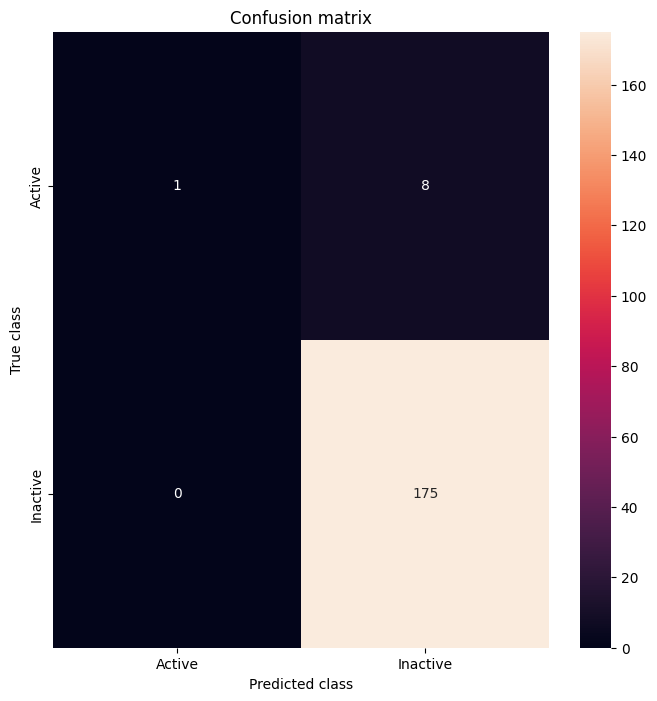

              precision    recall  f1-score   support

      Active       1.00      0.11      0.20         9
    Inactive       0.96      1.00      0.98       175

    accuracy                           0.96       184
   macro avg       0.98      0.56      0.59       184
weighted avg       0.96      0.96      0.94       184



In [ ]:
mostrar_resultados(yt3, pred_cluster2)

##Entrenamiento (4) 0,2,3,4 y testeo en 1

In [ ]:
entrenamiento4= pd.concat([cluster0,cluster4,cluster2,cluster3])
testeo4= cluster1

In [ ]:
entrenamiento4["Activity"].value_counts()

Inactive    532
Active       57
Name: Activity, dtype: int64

In [ ]:
# filtrar SMILES que no den error
SMILES4= []
for i in range(len(entrenamiento4['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento4['canonical_smiles'].iloc[i])
    SMILES4.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento4['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES4]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors4 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity4= entrenamiento4['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X4= np.array(descriptors4)
y4 = np.array(Activity4)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                    ])


# empecé buscando algunos hiperparámetros genéricos y fui agregando para que los seleccionados no me queden en el borde
# Para poder usar el gridsearch con el pipeline, tienen que usar nombreestimador__parámetro para poder usar la grilla
svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=5,
                      scoring='accuracy')


svm_cv_poly.fit(X4, y4)
print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)

mejor_modelo4=svm_cv_poly.best_estimator_

Mejores hiperparámetros: {'svm__C': 0.1, 'svm__coef0': 1.5, 'svm__degree': 3}
Mejor Accuracy 0.9439663914240185


Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt4 = []
for i in range(len(testeo4['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo4['canonical_smiles'].iloc[i])
    SMILESt4.append(cs)

  except:
    print('Invalid SMILES:',testeo4['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt4]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst4= pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt4= testeo4['Activity'].tolist()

In [ ]:
Xt4 = np.array(descriptorst4)
yt4 = np.array(Activityt4)

pred_cluster1= mejor_modelo3.predict(Xt4)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt4,pred_cluster1), 3)
precision = round(precision_score(yt4,pred_cluster1, average='micro'), 3)
recall = round(recall_score(yt4, pred_cluster1, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt4,pred_cluster1)

Exactitud (Accuracy): 0.941
Precisión: 0.941
Exhaustividad (Recall): 0.941
F1-Score: 0.941


array([[ 0,  6],
       [ 0, 95]])

###Resutados 4

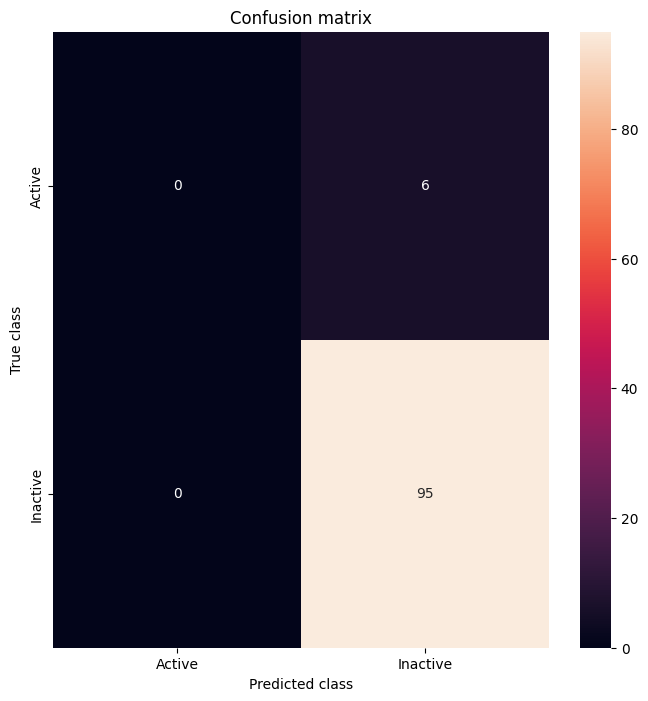

              precision    recall  f1-score   support

      Active       0.00      0.00      0.00         6
    Inactive       0.94      1.00      0.97        95

    accuracy                           0.94       101
   macro avg       0.47      0.50      0.48       101
weighted avg       0.88      0.94      0.91       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mostrar_resultados(yt4, pred_cluster1)

##Entrenamiento (5) 1,2,3,4 y testeo en 0


In [ ]:
entrenamiento5= pd.concat([cluster4,cluster1,cluster2,cluster3])
testeo5= cluster0

In [ ]:
entrenamiento5["Activity"].value_counts()

Inactive    425
Active       50
Name: Activity, dtype: int64

In [ ]:
# filtrar SMILES que no den error
SMILES5= []
for i in range(len(entrenamiento5['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(entrenamiento5['canonical_smiles'].iloc[i])
    SMILES5.append(cs)

  except:
    print('Invalid SMILES:',entrenamiento5['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILES5]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptors5 = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activity5= entrenamiento5['Activity'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X5= np.array(descriptors5)
y5 = np.array(Activity5)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                    ])


# empecé buscando algunos hiperparámetros genéricos y fui agregando para que los seleccionados no me queden en el borde
# Para poder usar el gridsearch con el pipeline, tienen que usar nombreestimador__parámetro para poder usar la grilla
svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=5,
                      scoring='accuracy')


svm_cv_poly.fit(X5, y5)
print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)

mejor_modelo5=svm_cv_poly.best_estimator_

Mejores hiperparámetros: {'svm__C': 10, 'svm__coef0': 0, 'svm__degree': 2}
Mejor Accuracy 0.9263157894736842


Testeo

In [ ]:
# filtrar SMILES que no den error
SMILESt5 = []
for i in range(len(testeo5['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(testeo5['canonical_smiles'].iloc[i])
    SMILESt5.append(cs)

  except:
    print('Invalid SMILES:',testeo5['canonical_smiles'].iloc[i],i)


# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESt5]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]

descriptorst5= pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activityt5= testeo5['Activity'].tolist()

In [ ]:
Xt5 = np.array(descriptorst5)
yt5 = np.array(Activityt5)

pred_cluster0= mejor_modelo3.predict(Xt5)

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yt5,pred_cluster0), 3)
precision = round(precision_score(yt5,pred_cluster0, average='micro'), 3)
recall = round(recall_score(yt5, pred_cluster0, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yt5,pred_cluster0)

Exactitud (Accuracy): 0.94
Precisión: 0.94
Exhaustividad (Recall): 0.94
F1-Score: 0.94


array([[  0,  13],
       [  0, 202]])

### Resultados 5

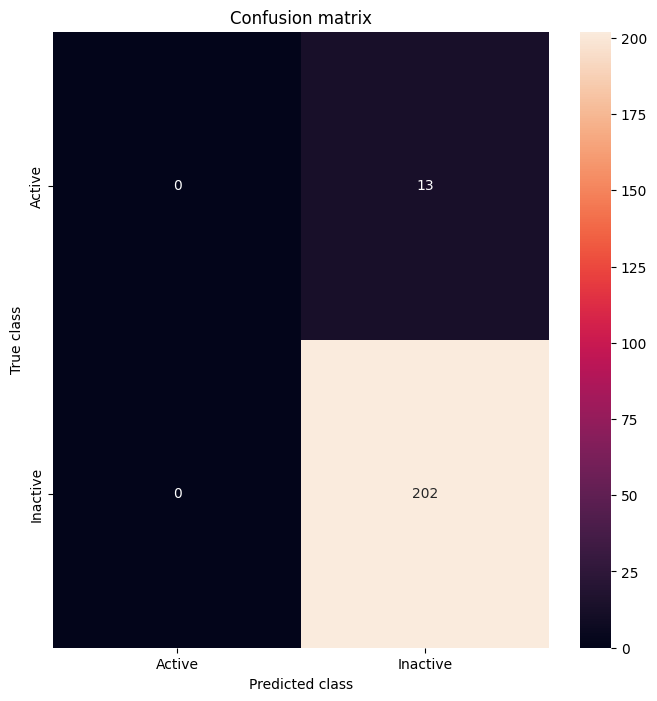

              precision    recall  f1-score   support

      Active       0.00      0.00      0.00        13
    Inactive       0.94      1.00      0.97       202

    accuracy                           0.94       215
   macro avg       0.47      0.50      0.48       215
weighted avg       0.88      0.94      0.91       215



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mostrar_resultados(yt5, pred_cluster0)

##Prueba en testeo

In [ ]:
#use el modelo 3 para probar creoque es el que mejor predijo ambos

In [ ]:
total_prueba

,Unnamed: 0,index,canonical_smiles,ROMol,InchiKey,Activity,Organismo,Cluster_PCA
715,715,69241,CCCn1ccnc1CN1CCC(Oc2ccc(Cl)cc2)(C(=O)O)CC1,<rdkit.Chem.rdchem.Mol object at 0x7b12cfc76c70>,YTNKKDUGOVLRHH-UHFFFAOYSA-N,Inactive,Plasmodium,0
605,605,69128,CC(C)NC(=O)N1CCC(c2nnc3n2CCNC3)CC1,<rdkit.Chem.rdchem.Mol object at 0x7b12cfc6fa70>,JKLKRJCUGCCPBV-UHFFFAOYSA-N,Inactive,Plasmodium,2
120,120,0,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,<rdkit.Chem.rdchem.Mol object at 0x7b12d1b78a50>,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,Inactive,Plasmodium,2
208,208,88,Oc1ccc(Cl)cc1CNc1nc2ccccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7b12d1b7b1b0>,CICSCGMRUIMBNF-UHFFFAOYSA-N,Inactive,Plasmodium,0
380,380,260,Cc1ccc(S(=O)(=O)c2c(COC(=O)c3cccc(C)c3)c(-c3cc...,<rdkit.Chem.rdchem.Mol object at 0x7b12d1b87d80>,RGXXAMTXVCJIHY-UHFFFAOYSA-N,Inactive,Plasmodium,1
...,...,...,...,...,...,...,...,...
235,235,115,CCN1CCN(c2cc(C)c3cc(NC(=O)c4ccc(OC)c(OC)c4)ccc...,<rdkit.Chem.rdchem.Mol object at 0x7b12d1b7bd80>,YGHVMEYBSUHIGF-UHFFFAOYSA-N,Inactive,Plasmodium,1
333,333,213,CCOC(=O)C1CCN(C(=O)CN2C(=O)c3ccccc3C2c2c[nH]c3...,<rdkit.Chem.rdchem.Mol object at 0x7b12d1b868f0>,UJJWLXPPJYJCBA-UHFFFAOYSA-N,Inactive,Plasmodium,1
215,215,95,CC(O)(c1ccc(Cl)cc1)C(CN1CCCCC1)c1ccccc1.Cl,<rdkit.Chem.rdchem.Mol object at 0x7b12d1b7b4c0>,NTHPIZPRBUBXHK-UHFFFAOYSA-N,Inactive,Plasmodium,3
796,796,69323,CCc1nc(C2CCCN2Cc2noc(Cc3ccccc3)n2)no1,<rdkit.Chem.rdchem.Mol object at 0x7b12cfc7d0e0>,POHKSWBHMVQKTC-UHFFFAOYSA-N,Inactive,Plasmodium,2


In [ ]:
# filtrar SMILES que no den error
SMILESs= []
for i in range(len(total_prueba['canonical_smiles'])):
  try:
    cs = Chem.CanonSmiles(total_prueba['canonical_smiles'].iloc[i])
    SMILESs.append(cs)

  except:
    print('Invalid SMILES:',total_prueba['canonical_smiles'].iloc[i],i)

# molecules from smiles
ms = [Chem.MolFromSmiles(smile) for smile in SMILESs]
# number of atoms per molecule
numb = [mol.GetNumAtoms() for mol in ms]
# different atoms:
C = [] # carbon
O = [] # oxigen
N = [] # nitrogen
Cl=[]
F=[]
Br=[]
I=[]

nh2_pattern = Chem.MolFromSmarts("[NH2]")
nh2_counts = [len(mol.GetSubstructMatches(nh2_pattern)) for mol in ms]

ring5_counts = []
ring6_counts=[]


for mol in ms:
  c = 0
  o = 0
  n = 0
  cl=0
  f=0
  br=0
  i=0
  nh2_count = 0
  ring_info = mol.GetRingInfo()# Obtener sistemas de anillos saturados
  ring5_count = sum(1 for ring in ring_info.AtomRings() if len(ring) == 5)  # Contar anillos de 5 carbonos
  ring5_counts.append(ring5_count)
  ring6= sum(1 for ring in ring_info.AtomRings()if len(ring) == 6)  # Contar anillos de 5 carbonos
  ring6_counts.append(ring6)
  for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 6:
      c += 1
    if atom.GetAtomicNum() == 7:
      n += 1
    if atom.GetAtomicNum() == 8:
      o += 1
    if atom.GetAtomicNum() == 9:
      f += 1
    if atom.GetAtomicNum() == 17:
      cl += 1
    if atom.GetAtomicNum() == 35:
      br += 1
    if atom.GetAtomicNum() == 53:
      i += 1

  C.append(c)
  O.append(o)
  N.append(n)
  Cl.append(cl)
  F.append(f)
  Br.append(br)
  I.append(i)

# molecular weight
MolWeight = [Descriptors.ExactMolWt(mol) for mol in ms]
# rings
Rings = [Descriptors.RingCount(mol) for mol in ms]
# Total polar surface area
TPSA = [Descriptors.TPSA(mol) for mol in ms]
# Density Morgan FP
FpDM1 = [Descriptors.FpDensityMorgan1(mol) for mol in ms]
# rotatable bonds
RotBonds = [Descriptors.NumRotatableBonds(mol) for mol in ms]
# Obtener la carga formal de la molécula
formal_charge =[Chem.rdmolops.GetFormalCharge(mol) for mol in ms]
# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp =[Descriptors.MolLogP(mol) for mol in ms]


descriptorss = pd.DataFrame(list(zip(numb, C, O, N,F,Br,I,Cl, nh2_counts,ring5_counts,ring6_counts,MolWeight, Rings, TPSA, FpDM1, RotBonds,logp,formal_charge)))

Activitys= total_prueba['Activity'].tolist()

In [ ]:
Xts = np.array(descriptorss)
yts = np.array(Activitys)

pred_prueba= mejor_modelo3.predict(Xts)

In [ ]:
total_prueba['Activity'].value_counts()

Inactive    157
Active       16
Name: Activity, dtype: int64

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy = round(accuracy_score(yts,pred_prueba), 3)
precision = round(precision_score(yts,pred_prueba, average='micro'), 3)
recall = round(recall_score(yts, pred_prueba, average='micro'), 3)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión: {precision}")
print(f"Exhaustividad (Recall): {recall}")
print(f"F1-Score: {f1_score}")
confusion_matrix(yts,pred_prueba)

Exactitud (Accuracy): 0.936
Precisión: 0.936
Exhaustividad (Recall): 0.936
F1-Score: 0.936


array([[  5,  11],
       [  0, 157]])

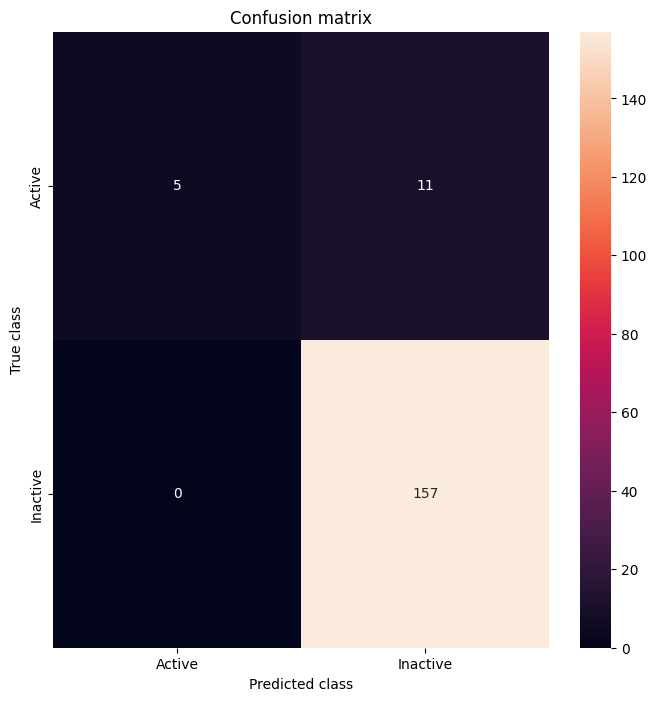

              precision    recall  f1-score   support

      Active       1.00      0.31      0.48        16
    Inactive       0.93      1.00      0.97       157

    accuracy                           0.94       173
   macro avg       0.97      0.66      0.72       173
weighted avg       0.94      0.94      0.92       173



In [ ]:
mostrar_resultados(yts,pred_prueba)